In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import random

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

## Load Dataset

In [2]:
df = pd.read_csv('pendigits.csv')
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


## Explore Data

In [6]:
def column_info(df):
   
    info_df = pd.DataFrame(columns=['Columns', 'Data_Type', 'Counts', 'Nulls', 'Uniques', 'Max', 'Min', 'Sample'])

    
    for col in df.columns:
        
        data_type = df[col].dtype
        
        count = df[col].count()
       
        nan_count = df[col].isnull().sum()
        
        unique_count = df[col].nunique()

        if pd.api.types.is_numeric_dtype(df[col]):
            
            max_value = df[col].max()
            min_value = df[col].min()
            non_nan_values = df[col].dropna().unique().tolist()
            random_value = random.choice(non_nan_values) if non_nan_values else None
            
            info_df = info_df._append({'Columns': col, 'Data_Type': data_type, 'Counts': count, 'Nulls': nan_count, 'Uniques': unique_count,
                                      'Max': max_value,
                                      'Min': min_value,
                                      'Sample': random_value}, ignore_index=True)
        else:
            
            sample_values = df[col].dropna().unique().tolist()
            
            info_df = info_df._append({'Columns': col, 'Data_Type': data_type, 'Counts': count, 'Nulls': nan_count, 'Uniques': unique_count,
                                      'Max': 'no value',
                                      'Min': 'no value',
                                      'Sample': random.choice(sample_values) if sample_values else None}, ignore_index=True)

    return info_df

In [7]:
column_info(df)

,Columns,Data_Type,Counts,Nulls,Uniques,Max,Min,Sample
0,input1,int64,10992,0,101,100,0,44
1,input2,int64,10992,0,96,100,0,33
2,input3,int64,10992,0,101,100,0,89
3,input4,int64,10992,0,98,100,0,74
4,input5,int64,10992,0,101,100,0,11
5,input6,int64,10992,0,101,100,0,59
6,input7,int64,10992,0,101,100,0,22
7,input8,int64,10992,0,101,100,0,97
8,input9,int64,10992,0,101,100,0,77
9,input10,int64,10992,0,101,100,0,4


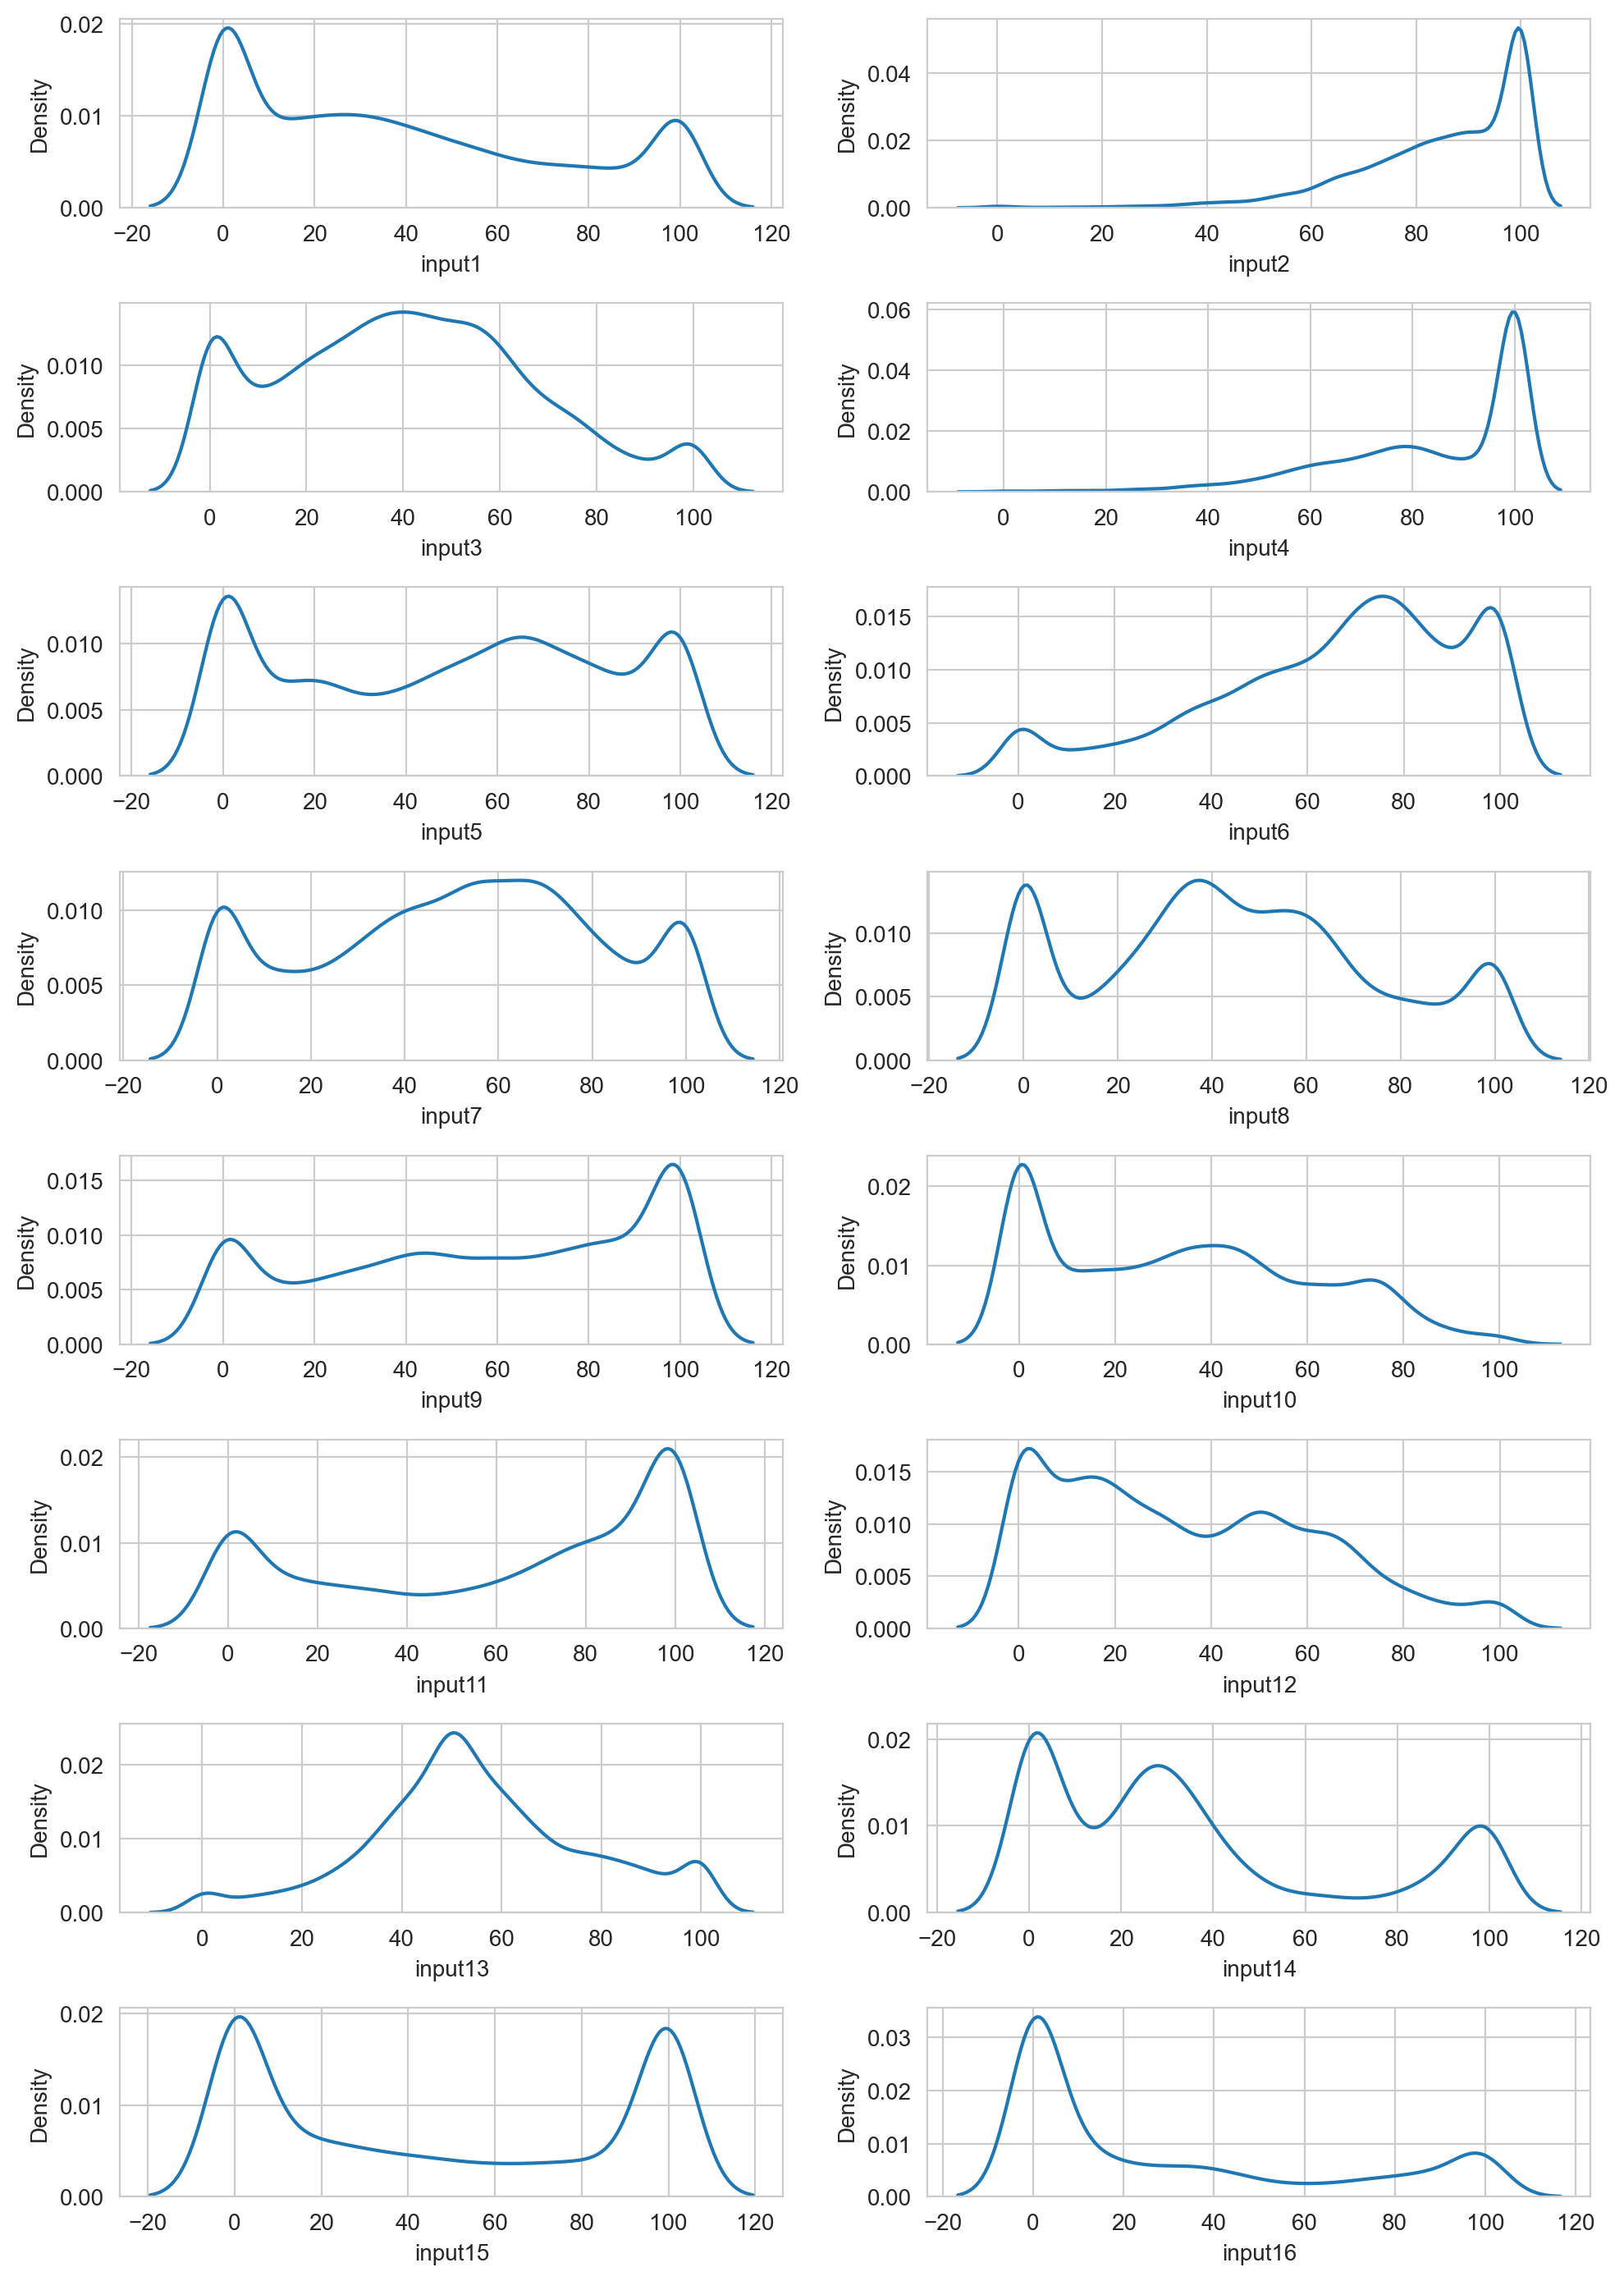

In [8]:
fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.kdeplot(df[col])
plt.tight_layout();

In [9]:
df.isnull().sum().any()

False

<Axes: >

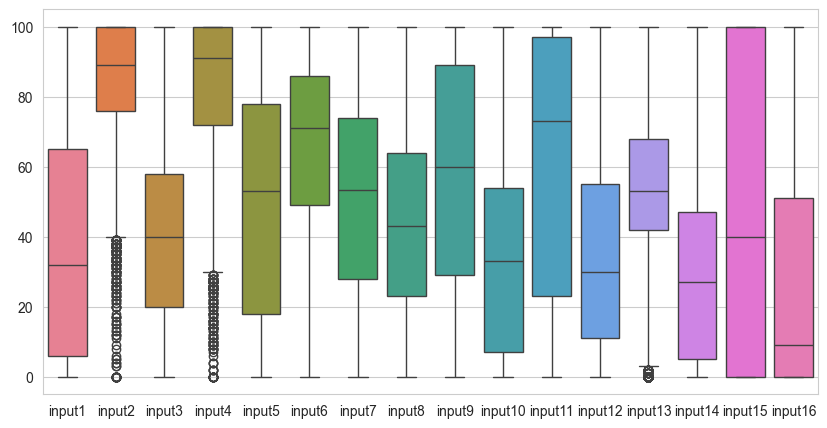

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df.drop("class", axis=1))

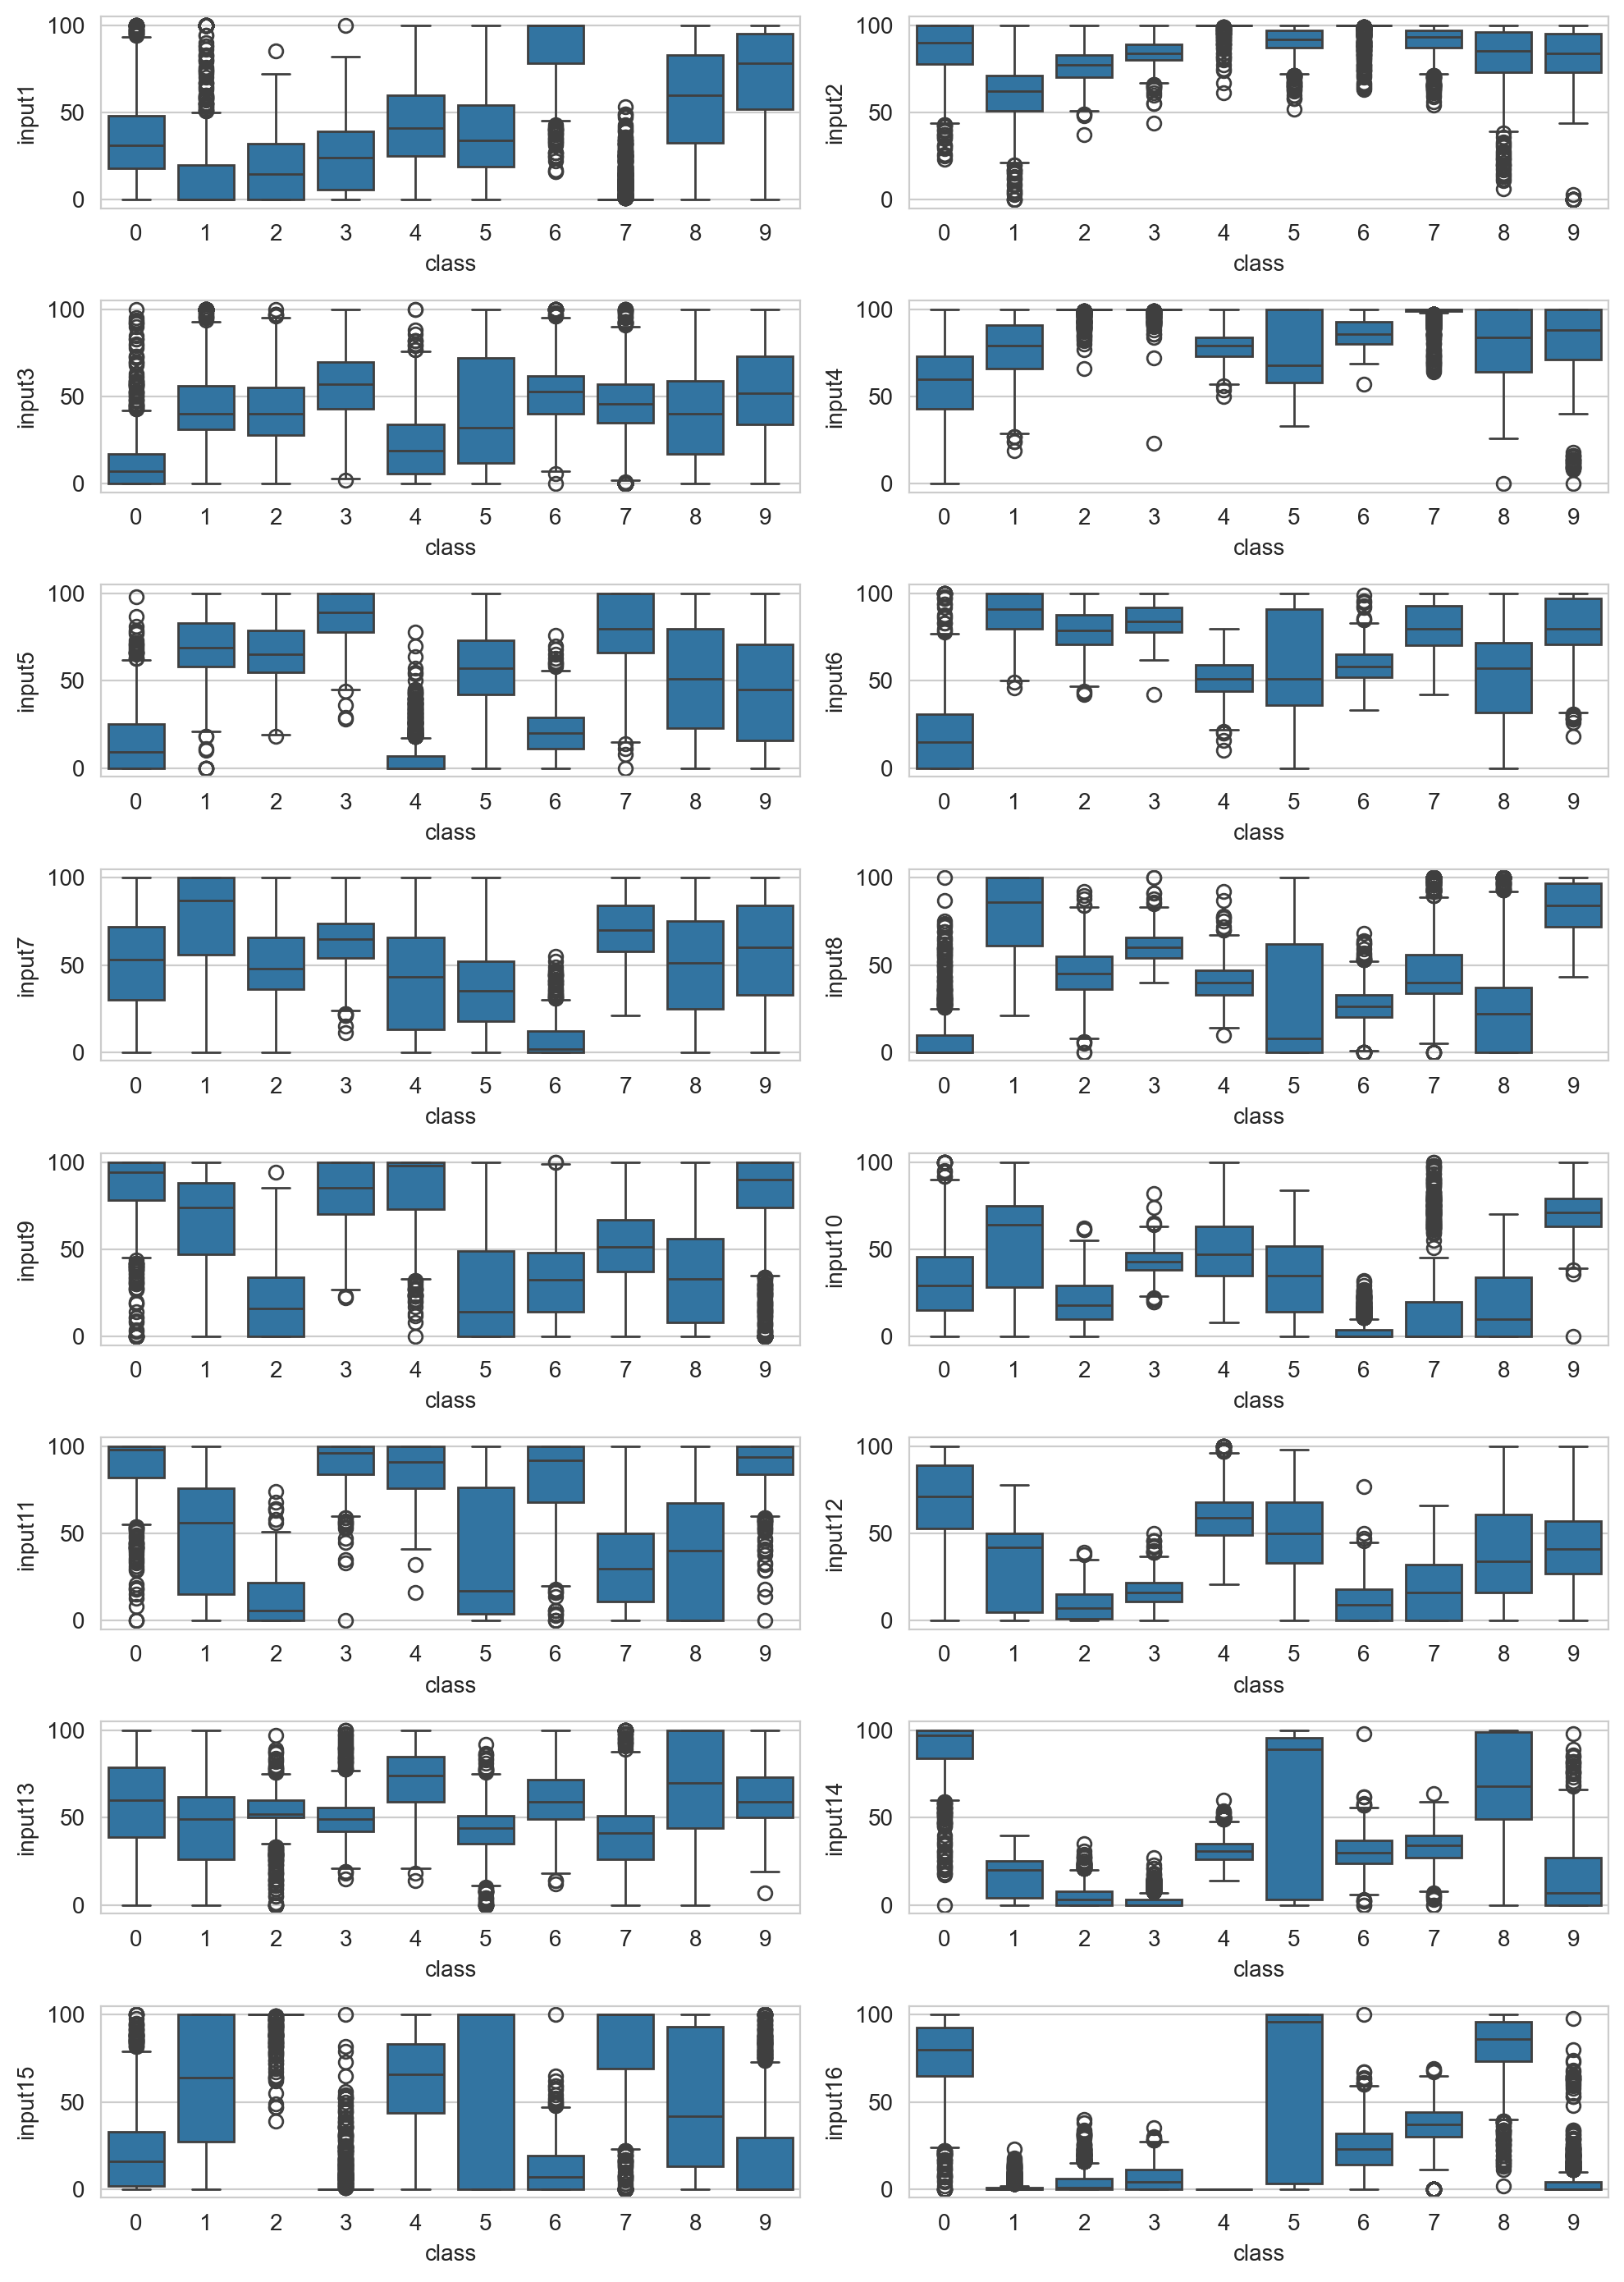

In [11]:
fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.boxplot(y= df[col], x = df["class"], data=df)
plt.tight_layout();

In [12]:
def detect_outliers(df, col_name,tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [13]:
threshold = 1.5
out_cols = []
for col in df.columns:
    print(
        f"{col}\nlower:{detect_outliers(df, col,threshold)[0]} \nupper:{detect_outliers(df, col,threshold)[1]}\
        \noutlier:{detect_outliers(df, col,threshold)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(df, col,threshold)[2] > 0 :
        out_cols.append(col)
print(out_cols) 

input1
lower:-82.5 
upper:153.5        
outlier:0
*-*-*-*-*-*-*
input2
lower:40.0 
upper:136.0        
outlier:196
*-*-*-*-*-*-*
input3
lower:-37.0 
upper:115.0        
outlier:0
*-*-*-*-*-*-*
input4
lower:30.0 
upper:142.0        
outlier:153
*-*-*-*-*-*-*
input5
lower:-72.0 
upper:168.0        
outlier:0
*-*-*-*-*-*-*
input6
lower:-6.5 
upper:141.5        
outlier:0
*-*-*-*-*-*-*
input7
lower:-41.0 
upper:143.0        
outlier:0
*-*-*-*-*-*-*
input8
lower:-38.5 
upper:125.5        
outlier:0
*-*-*-*-*-*-*
input9
lower:-61.0 
upper:179.0        
outlier:0
*-*-*-*-*-*-*
input10
lower:-63.5 
upper:124.5        
outlier:0
*-*-*-*-*-*-*
input11
lower:-88.0 
upper:208.0        
outlier:0
*-*-*-*-*-*-*
input12
lower:-55.0 
upper:121.0        
outlier:0
*-*-*-*-*-*-*
input13
lower:3.0 
upper:107.0        
outlier:208
*-*-*-*-*-*-*
input14
lower:-58.0 
upper:110.0        
outlier:0
*-*-*-*-*-*-*
input15
lower:-150.0 
upper:250.0        
outlier:0
*-*-*-*-*-*-*
input16
lower:-76.5 
upper:127.5

In [14]:
out_cols

['input2', 'input4', 'input13']

In [15]:
df1 = df.copy()

for col in out_cols:
    df1 = df1[(df1[col] > detect_outliers(df1, col)[0])
             & (df1[col] < detect_outliers(df1, col)[1])]
    


df1.shape

(10450, 17)

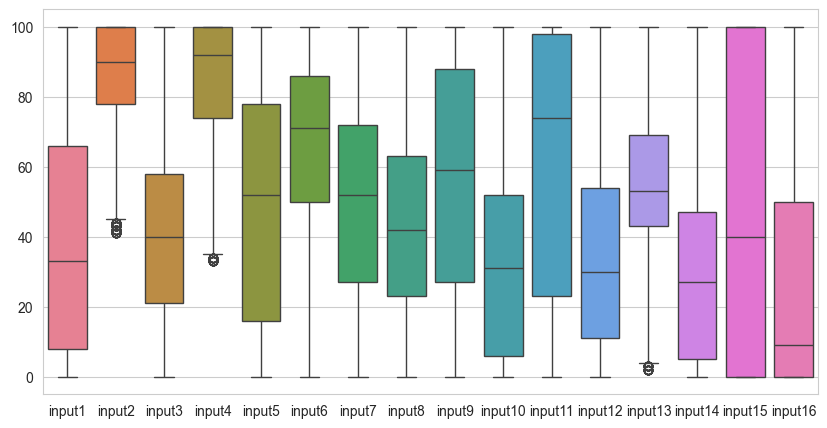

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df1.drop("class", axis=1));

In [17]:
len(df) - len(df1)

542

In [18]:
for i in range(0,10) :
    print(f"the number of {i}--->{df[df['class'] == i].shape[0]}")

the number of 0--->1143
the number of 1--->1143
the number of 2--->1144
the number of 3--->1055
the number of 4--->1144
the number of 5--->1055
the number of 6--->1056
the number of 7--->1142
the number of 8--->1055
the number of 9--->1055


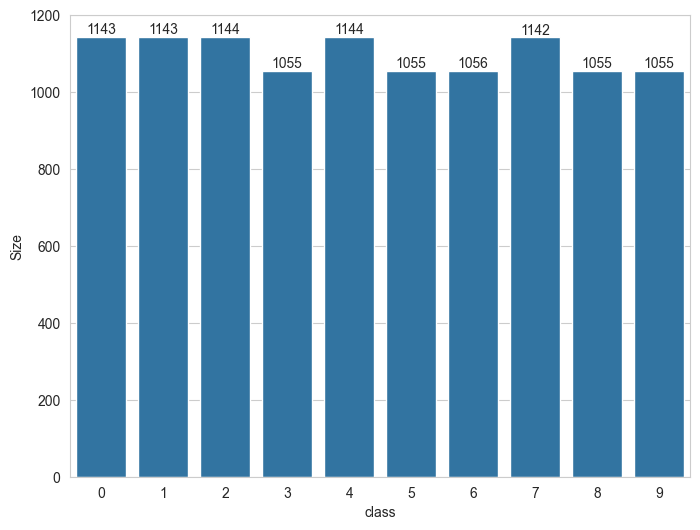

In [19]:
class_digit = df.groupby('class').size()
class_label = pd.DataFrame(class_digit,columns = ['Size'])
plt.figure(figsize = (8,6))
ax= sns.barplot(x = class_label.index, y = 'Size', data = class_label)
plt.bar_label(ax.containers[0]);

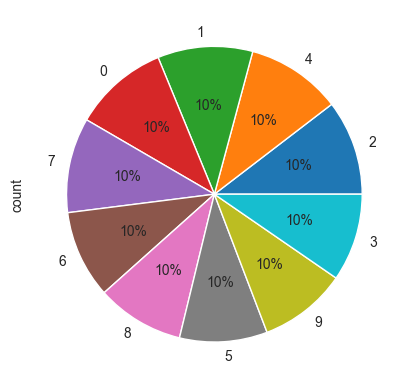

In [20]:
df["class"].value_counts().plot.pie(autopct='%1.0f%%');

### Now, let's take a closer look at correlation of continuous columns.

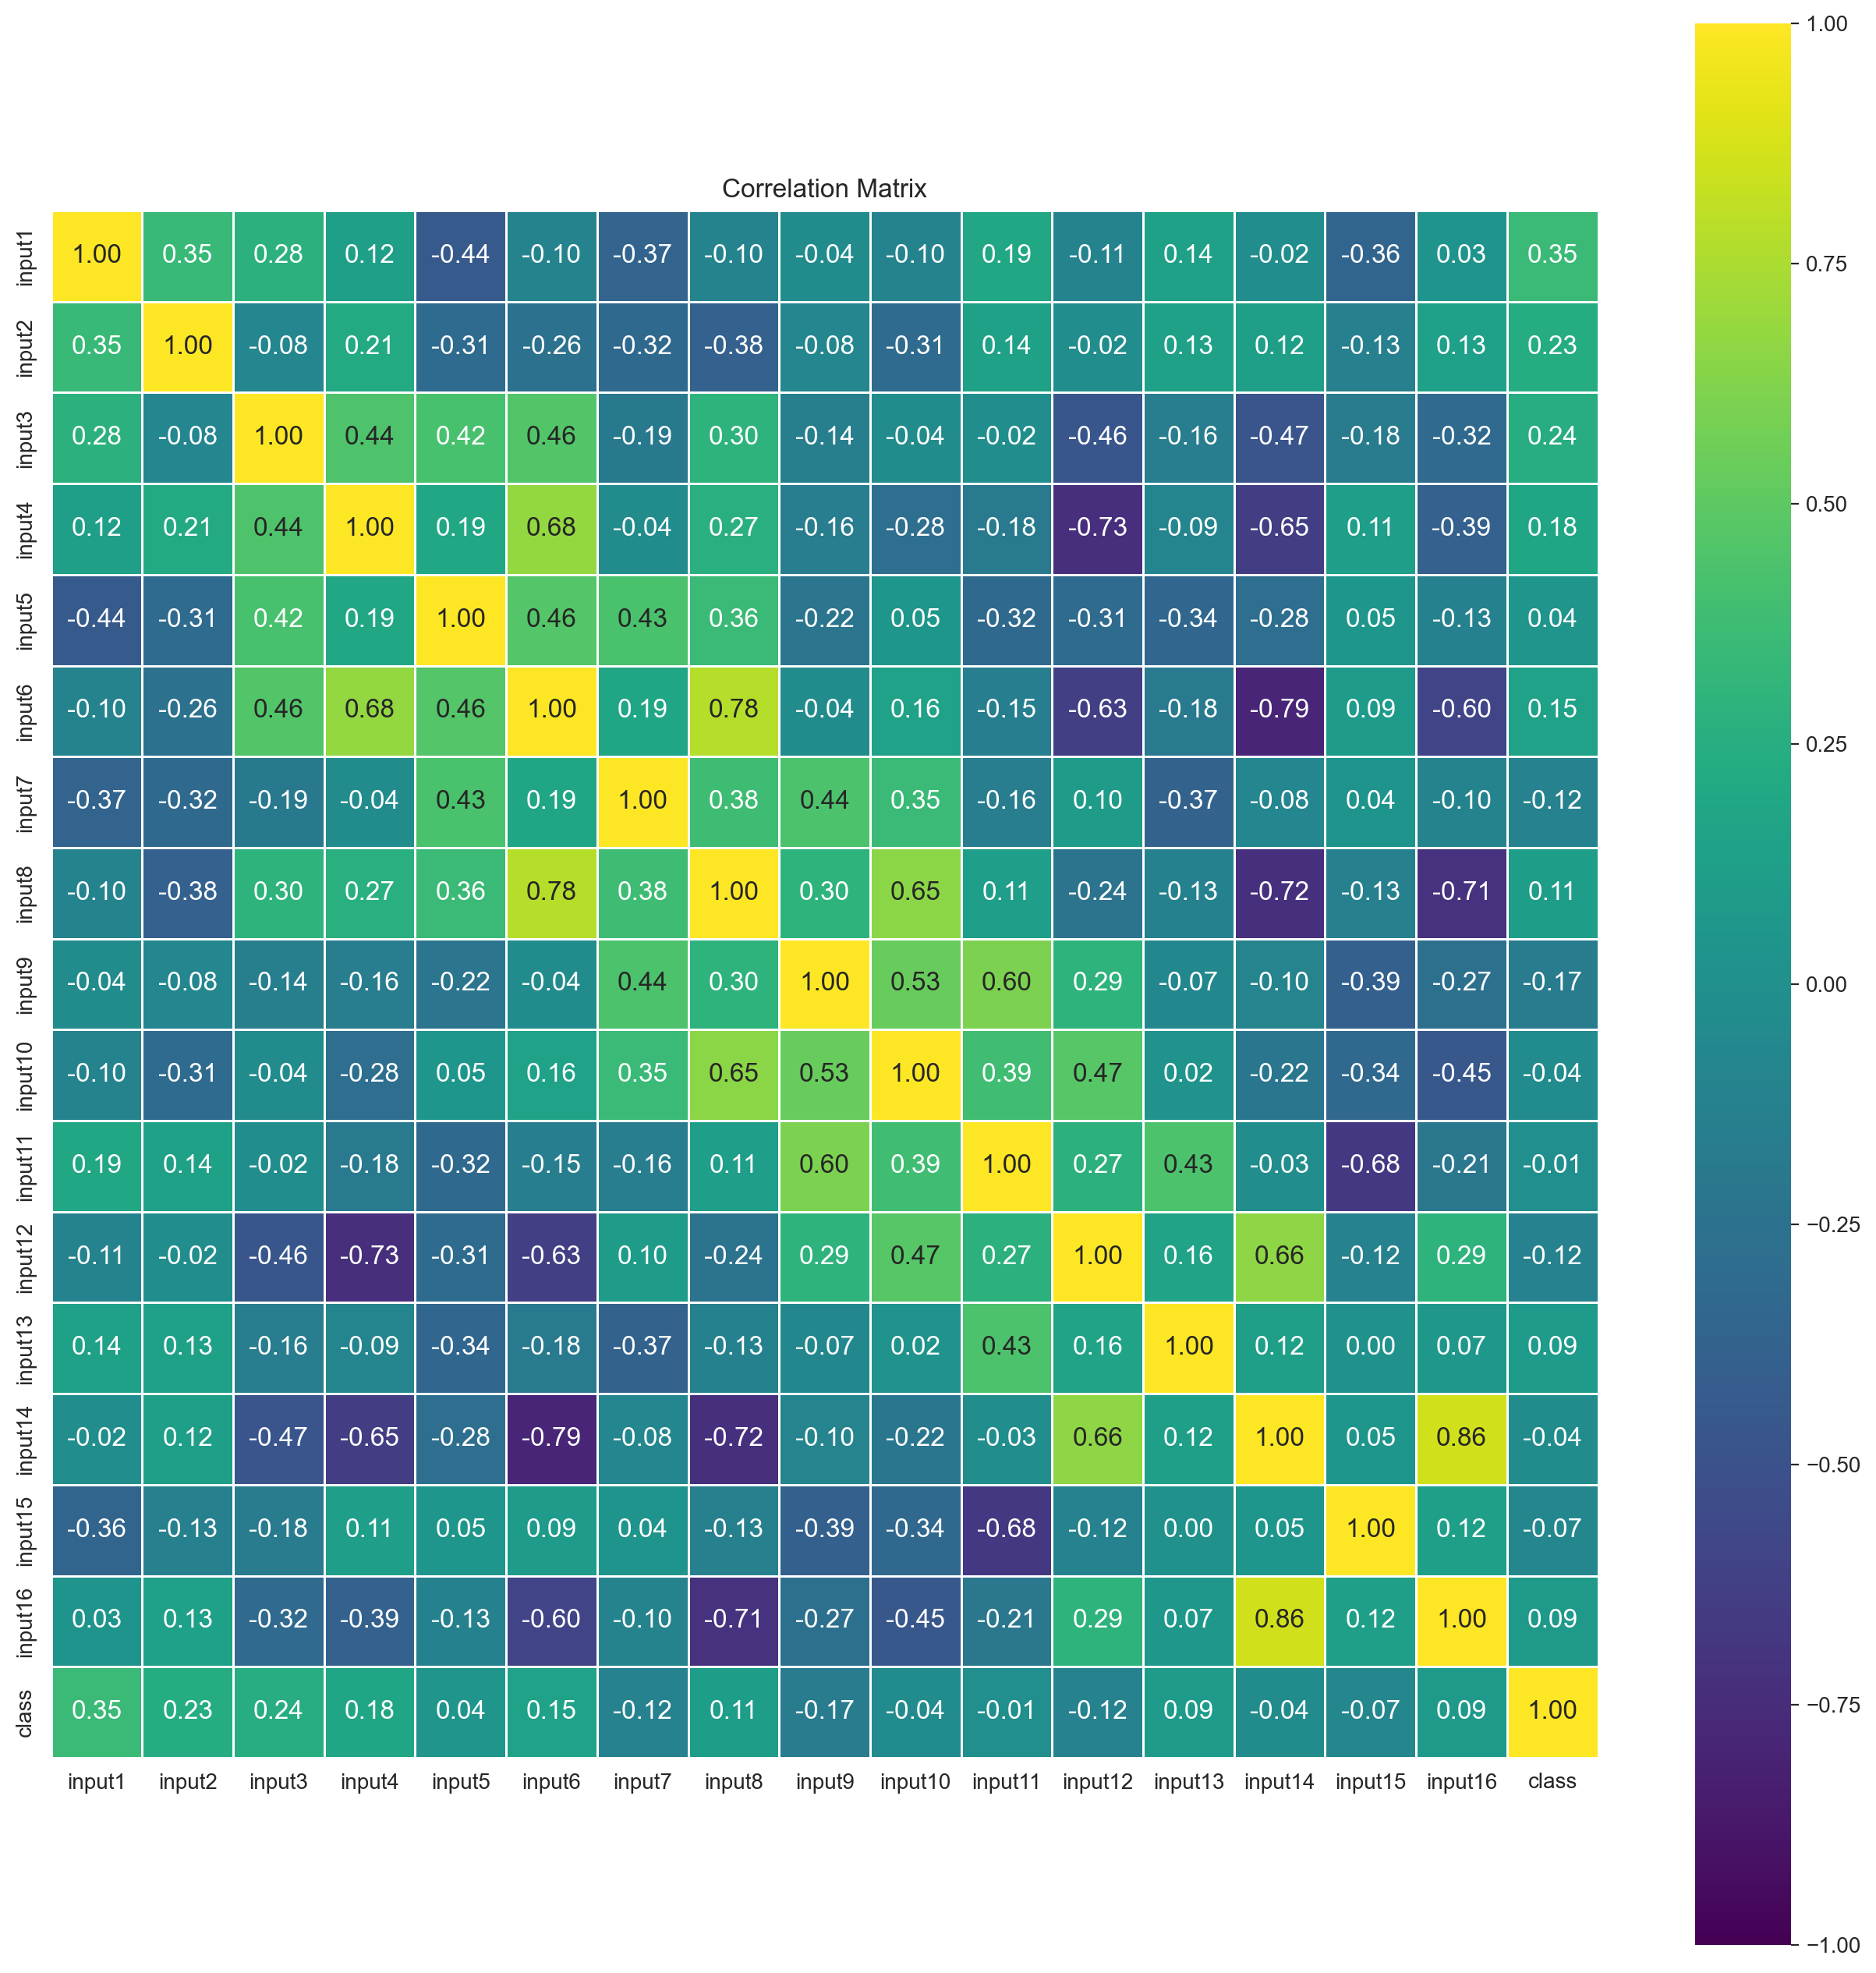

In [21]:
corr_matrix = df.corr()

plt.figure(figsize=(16, 16), dpi=200)
sns.heatmap(corr_matrix,square=True, annot=True, fmt=".2f", annot_kws={"size": 12}, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix")

plt.show();

In [22]:
df.to_csv("handdigit_EDA.csv", index = False)

## Multiclass Classification

### Data Preprocessing

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline  import Pipeline
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError, ROCAUC

In [25]:
df = pd.read_csv("handdigit_EDA.csv")

df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [26]:
X = df.drop('class', axis=1)
y = df['class']

In [40]:
y.unique()

array([8, 2, 1, 4, 6, 0, 5, 9, 7, 3], dtype=int64)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=False) 

## Support Vektor Machine

In [29]:
scaler = MinMaxScaler()

In [33]:
param_grid = { 'SVM__C': np.linspace(1, 1.3, 10),
                'SVM__gamma':['scale', 'auto']
                }

In [34]:
model = Pipeline([("scaler",scaler),("SVM", SVC(kernel="rbf"))]) 

svm_model = GridSearchCV(model,
                         param_grid,
                         verbose=2,
                         scoring='accuracy',
                         n_jobs=4)
svm_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVM', SVC())]),
             n_jobs=4,
             param_grid={'SVM__C': array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ]),
                         'SVM__gamma': ['scale', 'auto']},
             scoring='accuracy', verbose=2)

In [35]:
svm_model.best_params_

{'SVM__C': 1.1666666666666667, 'SVM__gamma': 'scale'}

In [36]:
svm_model.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()), ('SVM', SVC(C=1.1666666666666667))])

In [37]:
y_pred_test = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)


In [38]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

SVM_F1_test = f1_score(y_test, y_pred_test, average='macro')
SVM_F1_tran = f1_score(y_train, y_pred_train, average='macro')\

print('Accuracy Train Score:', SVM_accuracy_train)
print('Accuracy Test Score:', SVM_accuracy_test)
print('F1 Train Score:', SVM_F1_tran)
print('F1 Test Score:', SVM_F1_test)

Accuracy Train Score: 0.9964822901504125
Accuracy Test Score: 0.9898107714701602
F1 Train Score: 0.9964616881331348
F1 Test Score: 0.9899493981509441


In [41]:
cm = confusion_matrix(y_test, y_pred_test)

cm_df = pd.DataFrame(cm,
                     index=[8, 2, 1, 4, 6, 0, 5, 9, 7, 3],
                     columns=[8, 2, 1, 4, 6, 0, 5, 9, 7, 3])

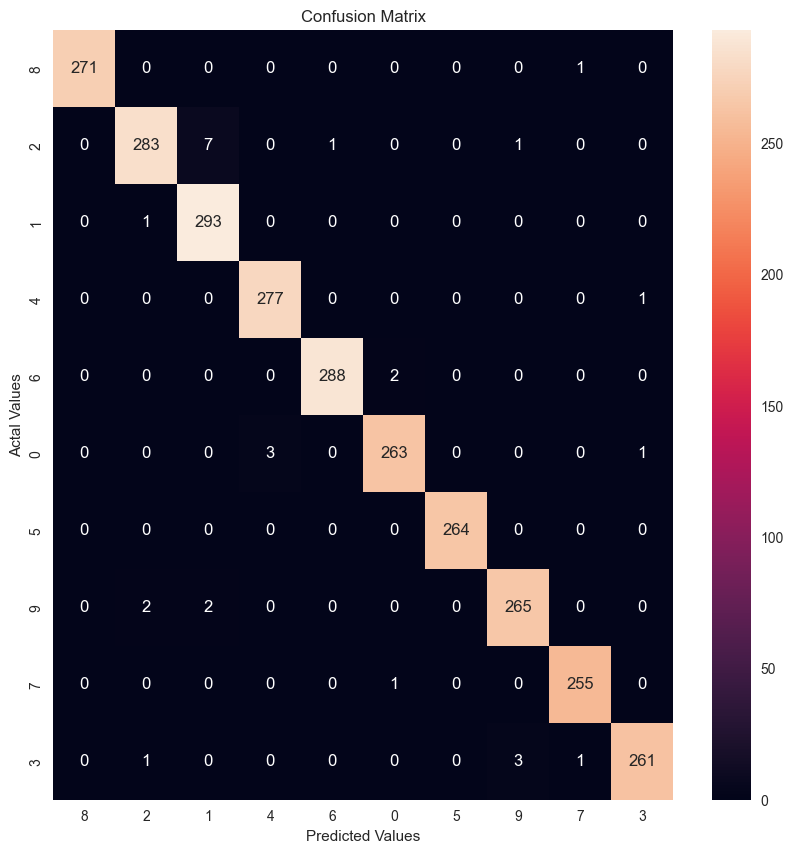

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()